In [116]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [134]:
import pandas as pd
import cv2
import glob
import tensorflow as tf
import numpy as np

In [7]:
!unzip -uq 'drive/My Drive/Covid/archive.zip'

In [135]:
from skimage.transform import resize

def read_images(path,name):
  images=[]
  labels=[]
  for img in glob.glob(path+'/'+name+'/*.*'):
    imag=cv2.imread(img)
   
    image=resize(imag,(48,48,3))
    images.append(image)
    labels.append(name)
  return images, labels 


In [138]:
images_covid,labels=read_images('Covid19-dataset/train','Covid')

In [139]:
np.array(images_covid).shape

(111, 48, 48, 3)

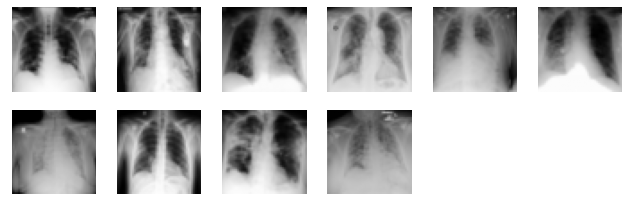

In [140]:
import matplotlib.pyplot as plt
plt.figure(figsize=(11,11))
for i in range(10):
  plt.subplot(6,6,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(True)
  plt.imshow(images_covid[i])

In [47]:
 labels=['Covid','Normal','Viral Pneumonia']
 all_images=[]
 all_labels=[]
 for label in labels:
   images,labelss=read_images('Covid19-dataset/train',label)
   all_images+=images
   all_labels+=labelss

In [76]:
 labels=['Covid','Normal','Viral Pneumonia']
 val_images=[]
 val_labels=[]
 for label in labels:
   images,label_new=read_images('Covid19-dataset/test',label)
   val_images+=images
   val_labels+=label_new

In [141]:
X_train=np.array(all_images)
y_train=np.array(all_labels)
X_train.shape

(251, 48, 48, 3)

In [142]:
X_valid=np.array(val_images)
y_valid=np.array(val_labels)

In [79]:
y_train.shape

(251,)

In [80]:
X_valid.shape


(66, 48, 48, 3)

In [81]:
y_valid.shape

(66,)

In [147]:
dict={0:'Covid',1:'Normal',2:'Viral pneumonia'}

In [148]:
for i , element in enumerate(y_train):
  if element=='Covid':
    y_train[i]=0
  elif element=='Normal':
    y_train[i]=1
  else :
    y_train[i]=2

In [149]:
for i , element in enumerate(y_valid):
  if element=='Covid':
    y_valid[i]=0
  elif element=='Normal':
    y_valid[i]=1
  else :
    y_valid[i]=2

In [150]:
y_train=tf.keras.utils.to_categorical(y_train)
y_valid=tf.keras.utils.to_categorical(y_valid)

In [151]:
from tensorflow import keras 
from tensorflow.keras import layers 
from keras.layers import Conv2D,Flatten,Dense,Dropout,Activation,MaxPooling2D
from keras.models import Sequential
from keras.layers import BatchNormalization
from keras.regularizers import l2
model=Sequential()
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',kernel_regularizer=l2(0.0001)))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(rate=0.3))

model.add(Conv2D(128,kernel_size=(3,3),activation='relu',kernel_regularizer=l2(0.0001)))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(rate=0.3))

model.add(Conv2D(256,kernel_size=(3,3),activation='relu',kernel_regularizer=l2(0.0001)))
model.add(Conv2D(256,kernel_size=(3,3),activation='relu'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(rate=0.3))
model.add(Flatten())
model.add(Dense(1024,activation='relu',kernel_regularizer=l2(0.0001)))
model.add(Dropout(rate=0.4))
model.add(Dense(3,activation='softmax'))

In [152]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [153]:
model.fit(X_train,y_train,validation_data=(X_valid,y_valid),batch_size=20,epochs=100)

Epoch 1/100
13/13 [==============================] - 15s 1s/step - loss: 1.0383 - accuracy: 0.6295 - val_loss: 1.6313 - val_accuracy: 0.3030
Epoch 2/100
13/13 [==============================] - 14s 1s/step - loss: 0.5963 - accuracy: 0.8048 - val_loss: 2.4003 - val_accuracy: 0.3939
Epoch 3/100
13/13 [==============================] - 13s 1s/step - loss: 0.4951 - accuracy: 0.8287 - val_loss: 1.4799 - val_accuracy: 0.3636
Epoch 4/100
13/13 [==============================] - 13s 1s/step - loss: 0.4586 - accuracy: 0.8845 - val_loss: 1.1894 - val_accuracy: 0.4394
Epoch 5/100
13/13 [==============================] - 13s 1s/step - loss: 0.5293 - accuracy: 0.8486 - val_loss: 4.4556 - val_accuracy: 0.3333
Epoch 6/100
13/13 [==============================] - 13s 1s/step - loss: 0.5884 - accuracy: 0.8127 - val_loss: 1.9024 - val_accuracy: 0.5909
Epoch 7/100
13/13 [==============================] - 13s 1s/step - loss: 0.4887 - accuracy: 0.8606 - val_loss: 3.8078 - val_accuracy: 0.3939
Epoch 8/100
1

In [155]:
history=model.fit(X_train,y_train,validation_data=(X_valid,y_valid),batch_size=20,epochs=20)

Epoch 1/20
13/13 [==============================] - 13s 1s/step - loss: 0.1058 - accuracy: 0.9841 - val_loss: 0.3578 - val_accuracy: 0.9091
Epoch 2/20
13/13 [==============================] - 13s 1s/step - loss: 0.0790 - accuracy: 0.9960 - val_loss: 0.3727 - val_accuracy: 0.8939
Epoch 3/20
13/13 [==============================] - 13s 1s/step - loss: 0.0866 - accuracy: 0.9880 - val_loss: 0.7641 - val_accuracy: 0.8485
Epoch 4/20
13/13 [==============================] - 13s 1s/step - loss: 0.0809 - accuracy: 0.9920 - val_loss: 0.8322 - val_accuracy: 0.8485
Epoch 5/20
13/13 [==============================] - 13s 1s/step - loss: 0.1387 - accuracy: 0.9721 - val_loss: 0.3827 - val_accuracy: 0.9242
Epoch 6/20
13/13 [==============================] - 13s 1s/step - loss: 0.1015 - accuracy: 0.9761 - val_loss: 0.9048 - val_accuracy: 0.7727
Epoch 7/20
13/13 [==============================] - 14s 1s/step - loss: 0.1015 - accuracy: 0.9920 - val_loss: 0.6458 - val_accuracy: 0.8788
Epoch 8/20
13/13 [==

In [156]:
print(np.mean(history.history['val_accuracy']))

0.8575757622718811


In [157]:
from skimage import io
image=io.imread('img.jpg')


In [158]:
imag=np.asarray(image)
image=resize(imag,(48,48,3))

In [159]:
tab = []
tab.append(image)
tab = np.array(tab)
print(dict[np.argmax(model.predict(tab))])

Normal


In [161]:
image=io.imread('img1.jpg')
imag=np.asarray(image)
image=resize(imag,(48,48,3))
tab = []
tab.append(image)
tab = np.array(tab)
print(dict[np.argmax(model.predict(tab))])

Viral pneumonia
